
                        **TP2 Fouille de donnees**


          G2_TOUMBA-NGONGO-Christine BYAOMBE-MWINDULWA-Dieudonné


         Sujet: "Choix du Meilleur Prix et la Qualité du Diamant"


Contexte de la Description des Jeux de Données

      Ce jeu de données, composé de 53940 entrées et 10 variables, vise à analyser et prédire le prix des diamants en fonction de leurs caractéristiques physiques et de leur qualité.

      Ce jeu de données est utilisé pour identifier les caractéristiques influençant le prix des diamants, afin d'aider les consommateurs à faire le meilleur choix.


1. La Variable Cible

      price: Prix du diamant en dollars US (allant de 326 à 18,823 USD).


2. La Variable qualitatif

     color : couleur du diamant, de J (le pire) à D (le meilleur)

3. Variables catégorielles

      Cut: Qualité de la coupe du diamant, avec les catégories suivantes :
      Fair (Moyen);
      Good (Bon);
      Very Good (Très bon);
      Premium (Supérieur);
      Ideal (Idéal).

      Clarity: Mesure de la clarté du diamant, allant de I1 (pire) à IF (meilleur) avec des catégories intermédiaires telles que SI2, SI1, VS2, VS1, VVS2, VVS1.

4. Variables quantitatives

      price : prix en dollars US ($326 -- $18,823);

      carat: Poids du diamant en carats (allant de 0,2 à 5,01);

      x: Longueur du diamant en millimètres (0 à 10,74);

      y: Largeur du diamant en millimètres (0 à 58,9);

      z: Profondeur du diamant en millimètres (0 à 31,8);

      depth : pourcentage total de la profondeur = z / moyenne (x, y) = 2 * z / (x + y) (43 -- 79);
      
      table : largeur du sommet du diamant par rapport au point le plus large (43 -- 95).




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Diamond = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [ ]:
Diamond.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
Diamond.shape

(53940, 10)

Voici la taille de notre jeu de donnees
  - Individus: 53940
  - Variables: 10
  la variable cible de notre jeu de donnees est le prix de diamond (price)

In [ ]:
Diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Voici toutes les informations necessaires de notre jeu de donnees;
Le résultat de la commande Diamond.info() fournit des informations détaillées sur la structure du DataFrame.
Voici les points clés affichés :
1. Nombre d’entr ́ees : Le DataFrame contient 53 940 entr ́ees, num ́erot ́ees de 0 `a 53 939.
2. Colonnes : Il y a 10 colonnes dans le DataFrame :
3
• carat: type float64
• cut: type object
• color: type object
• clarity: type object
• depth: type float64
• table: type float64
• price: type int64
• x: type float64
• y: type float64
• z: type float64
• Valeurs non nulles : Toutes les colonnes contiennent 53 940 valeurs non nulles, ce qui indique qu’il
n’y a pas de valeurs manquantes dans le jeu de donn ́ees.
• Types de donn ́ees : Les colonnes sont de diff ́erents types de donn ́ees : float64 (6 colonnes), int64 (1
colonne), et object (3 colonnes).

In [ ]:
Diamond.describe(include='all')


carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

ci-haut, nous avons la description statistique sur les variables numériques  de notre jeu de données.

# 1.**la moyenne(mean)**
Variable 'price': cette variable renvoie le prix des diamants, la moyenne de tous les prix des diamants est de 3932.799722.

# **2.l'écart-type(std)**
L'ecart type du prix (price) est de 3989.439738.

# **3.le minimum & le maximum**
le prix de diamond de notre jeu varie entre 326.000000 et 18823.000000

# **4.Coorélation entre deux variables**

In [ ]:
moyenne_prix_cut=Diamond.groupby('cut')['price'].mean()
print(moyenne_prix_cut)

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64


In [ ]:
moyenne_price_color=Diamond.groupby('color')['price'].mean()
print(moyenne_price_color)

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


In [ ]:
moyenne_price_clarity=Diamond.groupby('clarity')['price'].mean()
print(moyenne_price_clarity)

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64


In [ ]:
moyenne_price=Diamond['price'].mean()
print("la moyenne du prix des diamants est :",moyenne_price)

la moyenne du prix des diamants est : 3932.799721913237


In [ ]:
variance_price=Diamond['price'].var()
print("la variance du prix des diamants est :",variance_price)

la variance du prix des diamants est : 15915629.424300838


In [ ]:
carat=Diamond['carat']
price=Diamond['price']
cor=np.corrcoef(carat,price)
corrélation=cor[0,1]
print("la coorélation entre le prix(price) et le carat(poids de Diamant) est :",corrélation)

la coorélation entre le prix(price) et le carat(poids de Diamant) est : 0.9215913011934771


la coorélation entre le prix(price) et le carat (poids des diamants) indique une coorélaton positive entre ces variables qui est une forte coorélation, cela signifie que lorsque le poids du diamant augmente, le prix a tendance d'augmenter également et vise versa.


Calcul de la variance

In [ ]:

depth=Diamond['depth']
price=Diamond['price']
cor=np.corrcoef(carat,price)
corrélation=cor[0,1]
print("la coorélation entre le prix(price) et le pourcentange de la profondeur(depth) est :",corrélation)

la coorélation entre le prix(price) et le pourcentange de la profondeur(depth) est : 0.9215913011934771


**TP 3 Analyse factorielle**

3. 1 Analyse du type de variables de dataset

In [ ]:
Diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Dans notre Jeu de données, nous avons carat en float, depth en float, table en float, price en int, (x, y, z) en float et cut, color, clarity en chaîne de caractères

In [ ]:
Diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

3.2 Analyse descriptive du dataset

  3.2.1 Description des variables qualitatives

In [ ]:
Diamond.describe(include='object')

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

<Axes: >

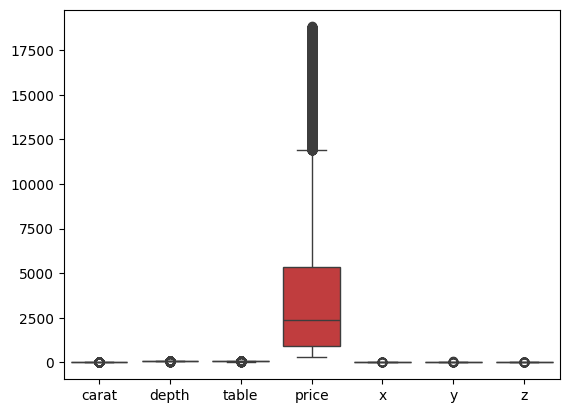

In [ ]:
sns.boxplot(data=Diamond)

Ce boxplot montre que les variables carat, depth, table, x, y et z ont des distributions très concentrées autour de valeurs faibles, avec quelques valeurs aberrantes, tandis que la variable price a une distribution beaucoup plus étendue avec plusieurs valeurs aberrantes très élevées.

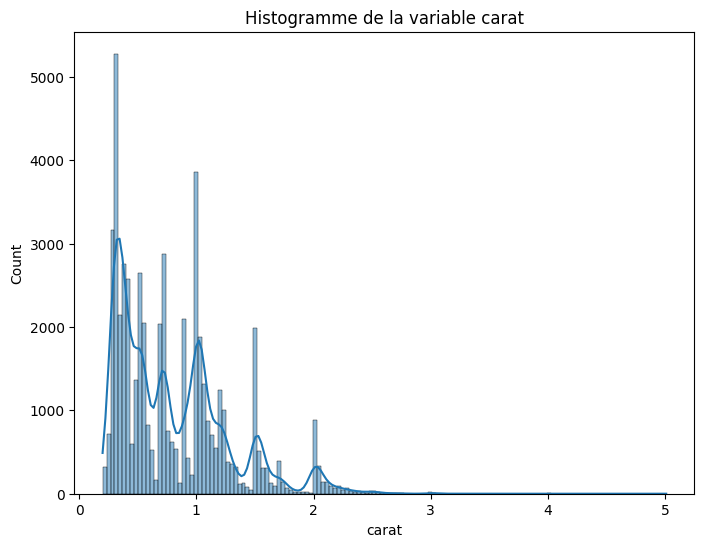

La variable carat ne suit pas une loi normale (p-value=0.0)


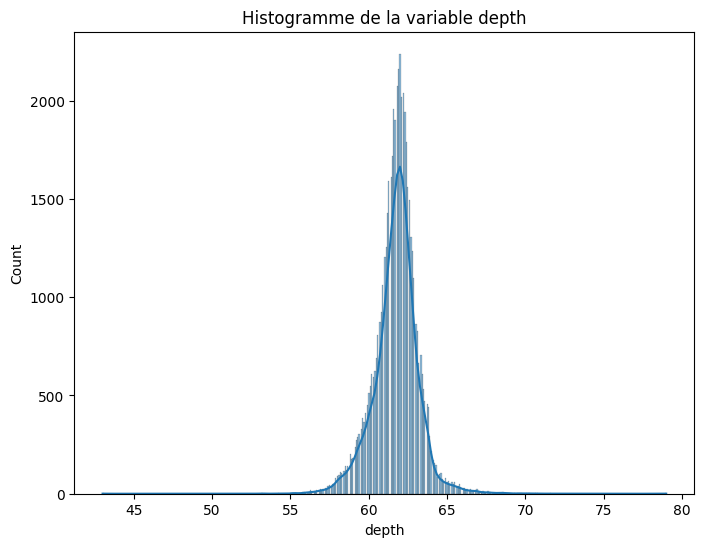

La variable depth ne suit pas une loi normale (p-value=0.0)


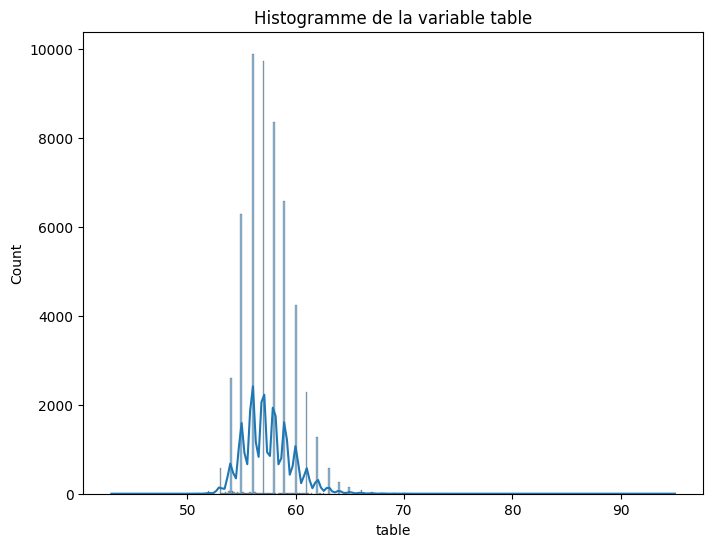

La variable table ne suit pas une loi normale (p-value=0.0)


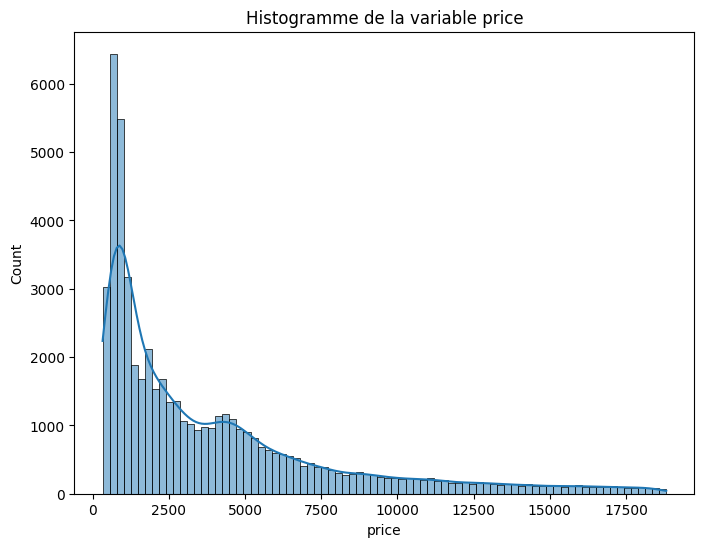

La variable price ne suit pas une loi normale (p-value=0.0)


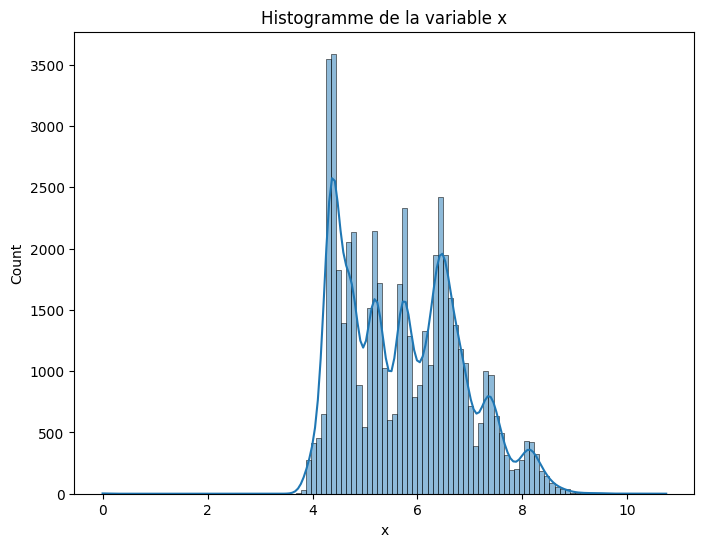

La variable x ne suit pas une loi normale (p-value=0.0)


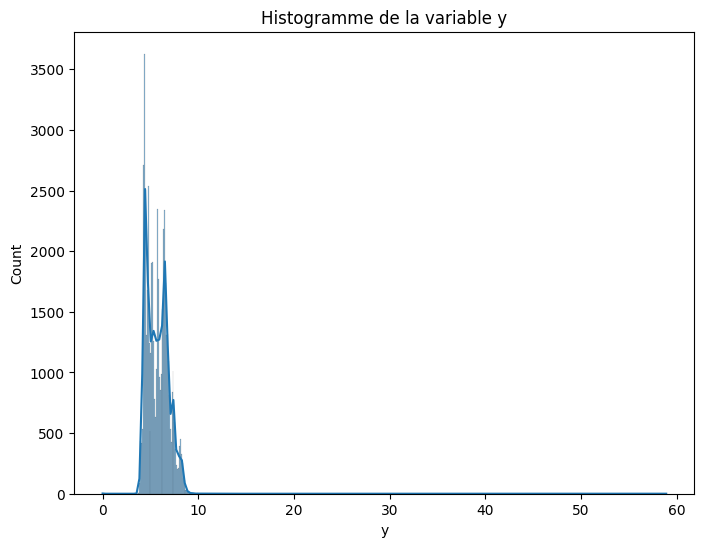

La variable y ne suit pas une loi normale (p-value=0.0)


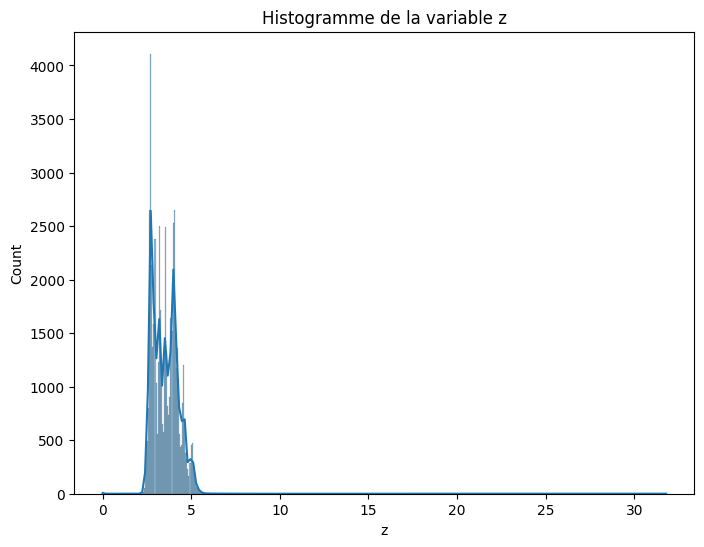

La variable z ne suit pas une loi normale (p-value=0.0)


In [ ]:
# Filtrer les colonnes numériques
numeric_columns = Diamond.select_dtypes(include=[np.number]).columns

# Analyse de la normalité
# Création d'un histogramme et d'un test de normalité pour chaque variable numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Diamond, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(Diamond[column].dropna())  # Supprimer les NaN avant le test
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")



<Axes: xlabel='count', ylabel='cut'>

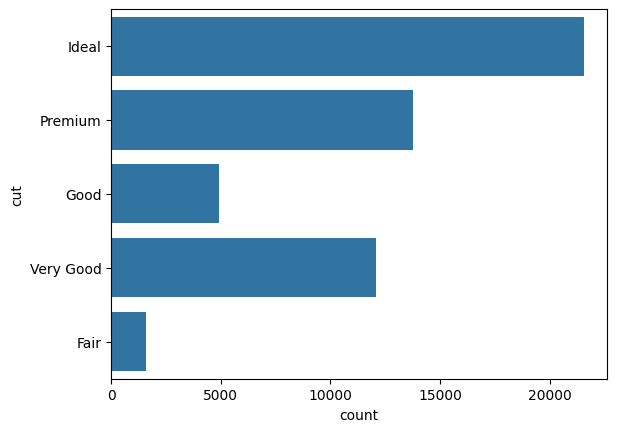

In [ ]:
# Analyse de la variable qualitative

sns.countplot(Diamond['cut'])

Ce diagramme montre que la majorité des diamants dans le DataFrame Diamond sont de cut "Ideal", suivis de près par "Premium" et "Very Good". Les catégories "Good" et "Fair" sont beaucoup moins représentées. Cette représentation est utile pour comprendre la distribution des qualités de coupe des diamants dans votre dataset.

<Axes: xlabel='count', ylabel='color'>

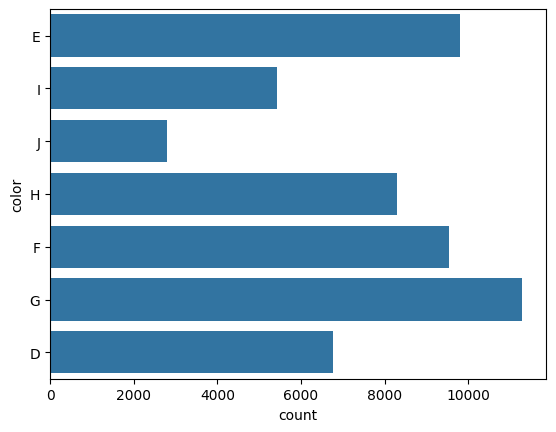

In [ ]:
sns.countplot(Diamond['color'])

ce diagramme montre que la majorité des diamants dans le DataFrame Diamond sont de couleur G, E, et F. Les catégories H, D, I, et J sont moins représentées.

<Axes: xlabel='count', ylabel='clarity'>

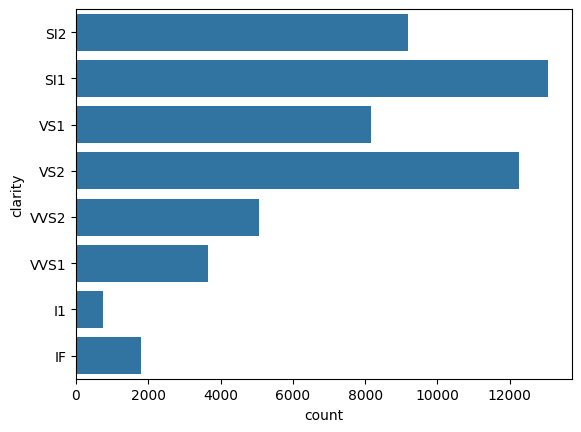

In [ ]:
sns.countplot(Diamond['clarity'])

Ce diagramme montre que la majorité des diamants dans le DataFrame Diamond sont de clarté SI1 et VS2. Les catégories SI2 et VS1 sont également bien représentées. Les catégories VVS2, VVS1, I1 et IF sont moins courantes.

([<matplotlib.patches.Wedge at 0x7b5a3ec007f0>,
 [Text(0.3414416126385917, 1.0456661155257725, 'Ideal'),
  Text(-1.0837708252563742, -0.18825726632222606, 'Premium'),
  Text(0.11867609137847009, -1.0935794371398584, 'Very Good'),
  Text(0.9790871199141089, -0.5013864892658114, 'Good'),
  Text(1.0951674706775656, -0.10299617065553196, 'Fair')])

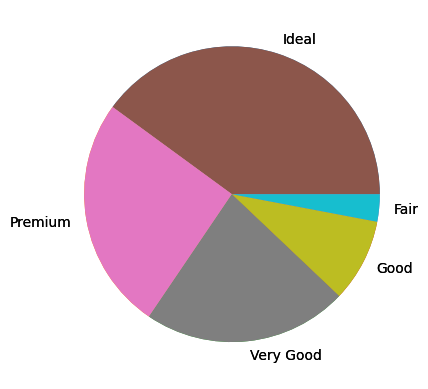

In [ ]:
# Création d'un tableau de fréquences pour la variable "cut" qui est la qualité de la coupe
freq_table = (Diamond['cut'].value_counts())/len(Diamond)

freq_table

#Création d'un diagramme circulaire pour le tableau de fréquence


plt.pie(freq_table,labels=freq_table.index)# Création d'un tableau de fréquences pour la variable "cut"
freq_table = (Diamond['cut'].value_counts())/len(Diamond)

freq_table

#Création d'un diagramme circulaire pour le tableau de fréquence


plt.pie(freq_table,labels=freq_table.index)

Ce diagramme montre que la majorité des diamants dans le DataFrame Diamond ont une coupe "Ideal", suivie par "Premium" et "Very Good". Les coupes "Good" et "Fair" sont beaucoup moins représentées.

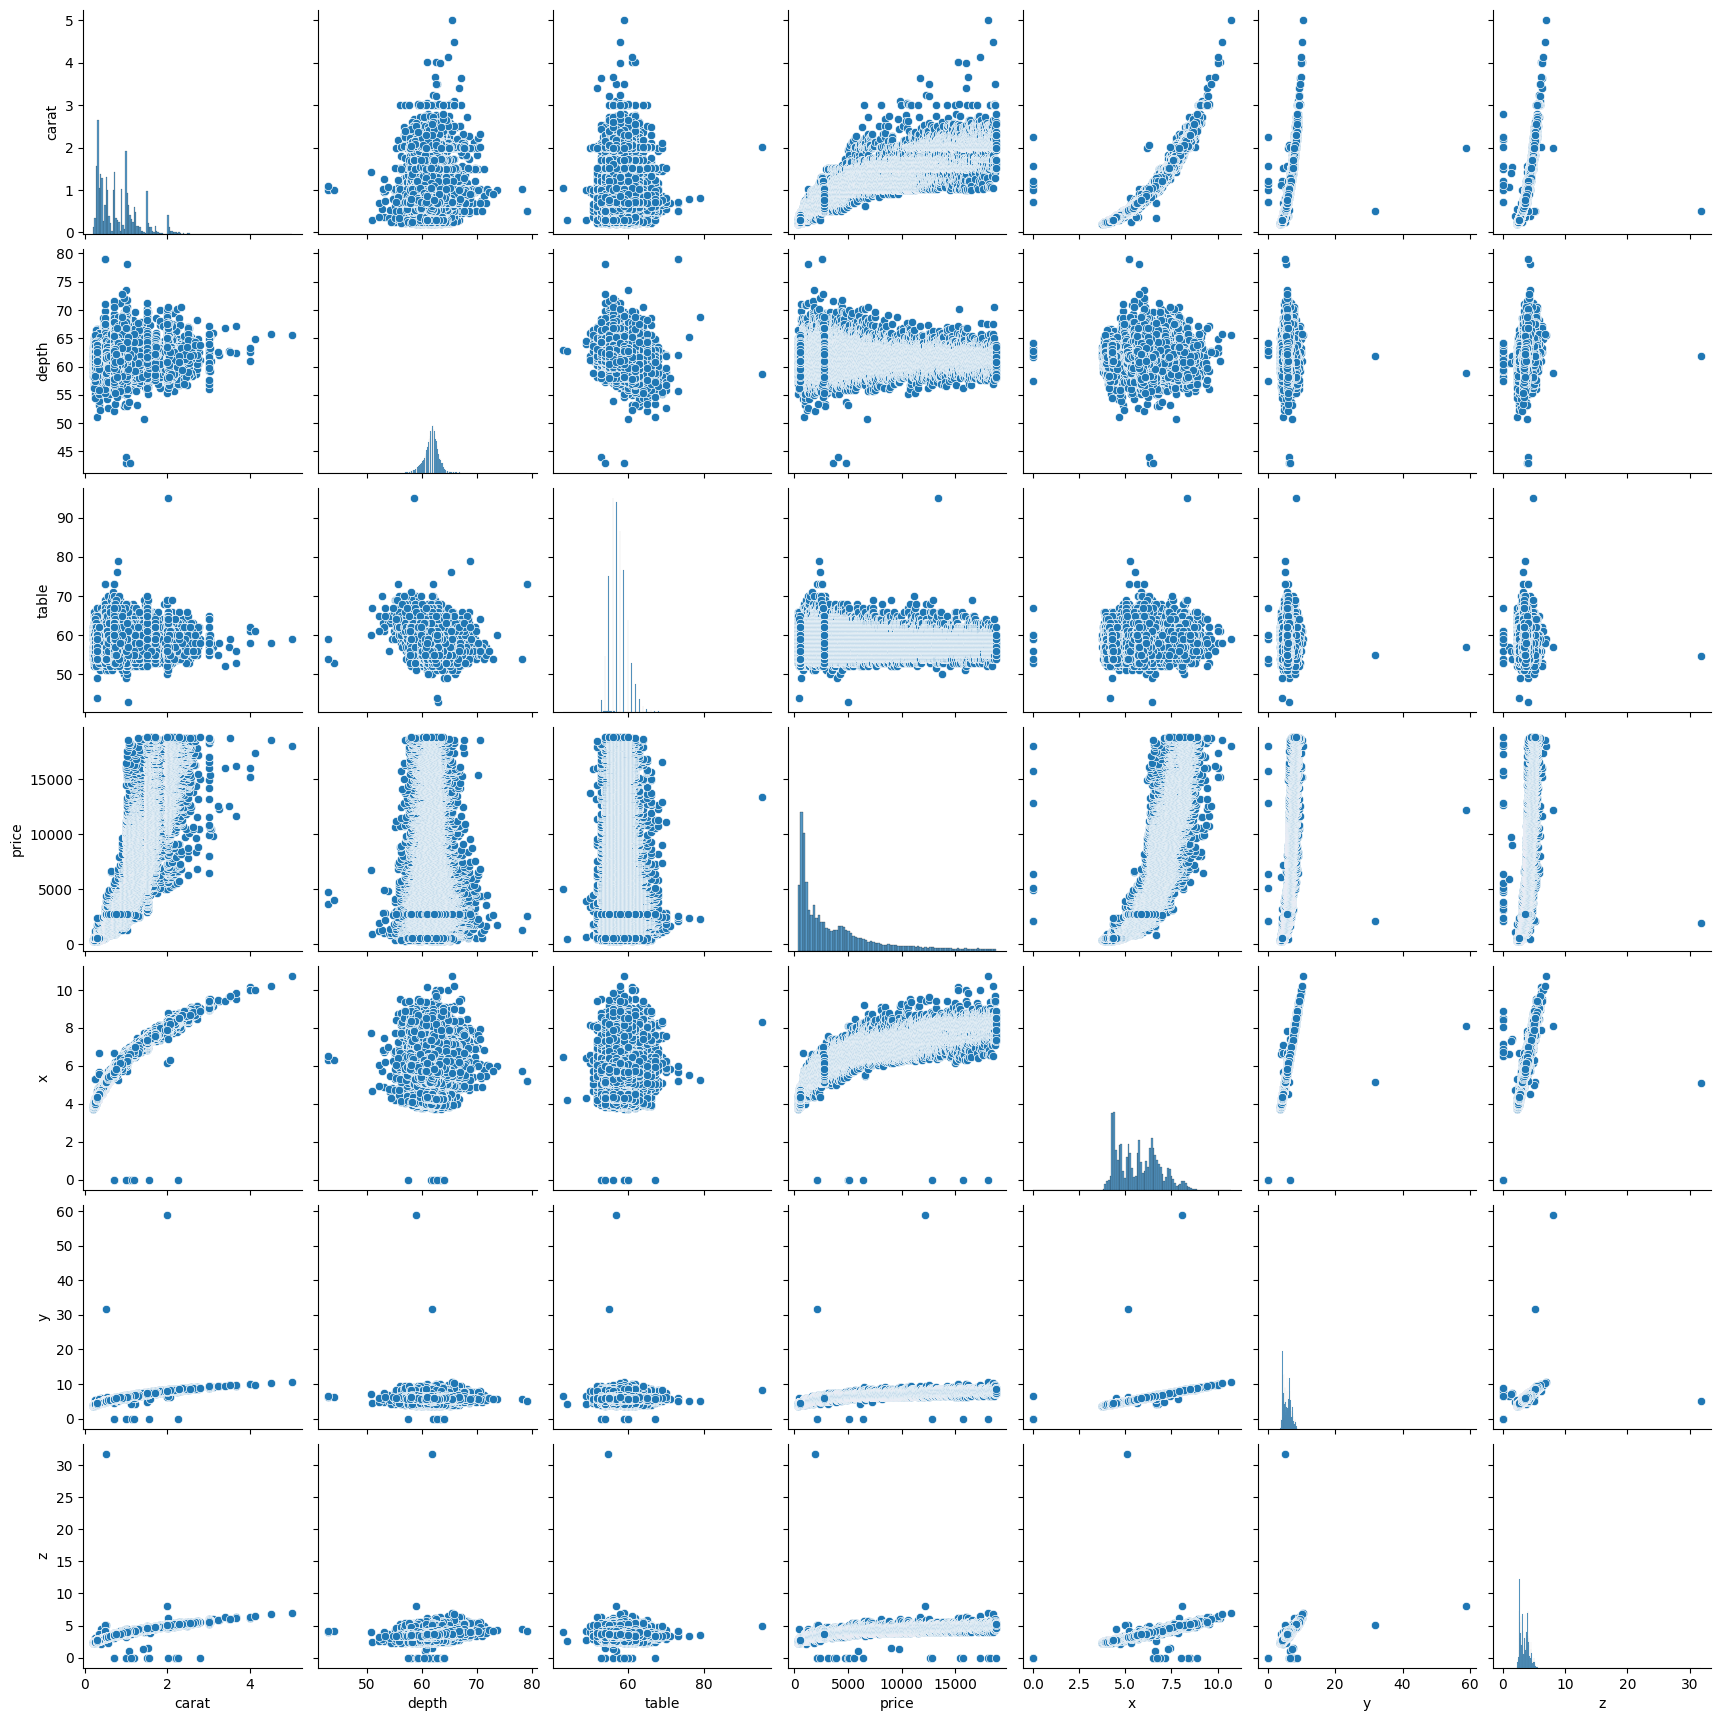

In [ ]:
sns.pairplot(Diamond)

            carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.017124  0.291437 -0.214290  0.028224  0.181618  0.921591   
cut      0.017124  1.000000  0.000304  0.028235 -0.194249  0.150327  0.039860   
color    0.291437  0.000304  1.000000 -0.027795  0.047279  0.026465  0.172511   
clarity -0.214290  0.028235 -0.027795  1.000000 -0.053080 -0.088223 -0.071535   
depth    0.028224 -0.194249  0.047279 -0.053080  1.000000 -0.295779 -0.010647   
table    0.181618  0.150327  0.026465 -0.088223 -0.295779  1.000000  0.127134   
price    0.921591  0.039860  0.172511 -0.071535 -0.010647  0.127134  1.000000   
x        0.975094  0.022342  0.270287 -0.225721 -0.025289  0.195344  0.884435   
y        0.951722  0.027572  0.263584 -0.217616 -0.029341  0.183760  0.865421   
z        0.953387  0.002037  0.268227 -0.224263  0.094924  0.150929  0.861249   

                x         y         z  
carat    0.975094  0.951722  0.953387  
cut      0.022342  0.027572 

<Axes: >

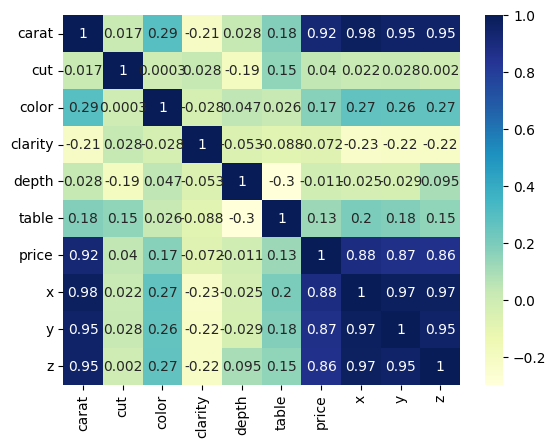

In [ ]:
#  Convertir les colonnes non numériques en codes numériques
#  'cut', 'color', 'clarity' sont des colonnes non numériques
categorical_columns = ['cut', 'color', 'clarity']
for column in categorical_columns:
    Diamond[column] = Diamond[column].astype('category').cat.codes

# Calculer la matrice de corrélation uniquement pour les colonnes numériques
numeric_columns = Diamond.select_dtypes(include=[np.number]).columns
corr_matrix = Diamond[numeric_columns].corr()

# Afficher la matrice de corrélation
print(corr_matrix)

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")


Nous voyons avec la matrice de corrélation que le prix du diamant

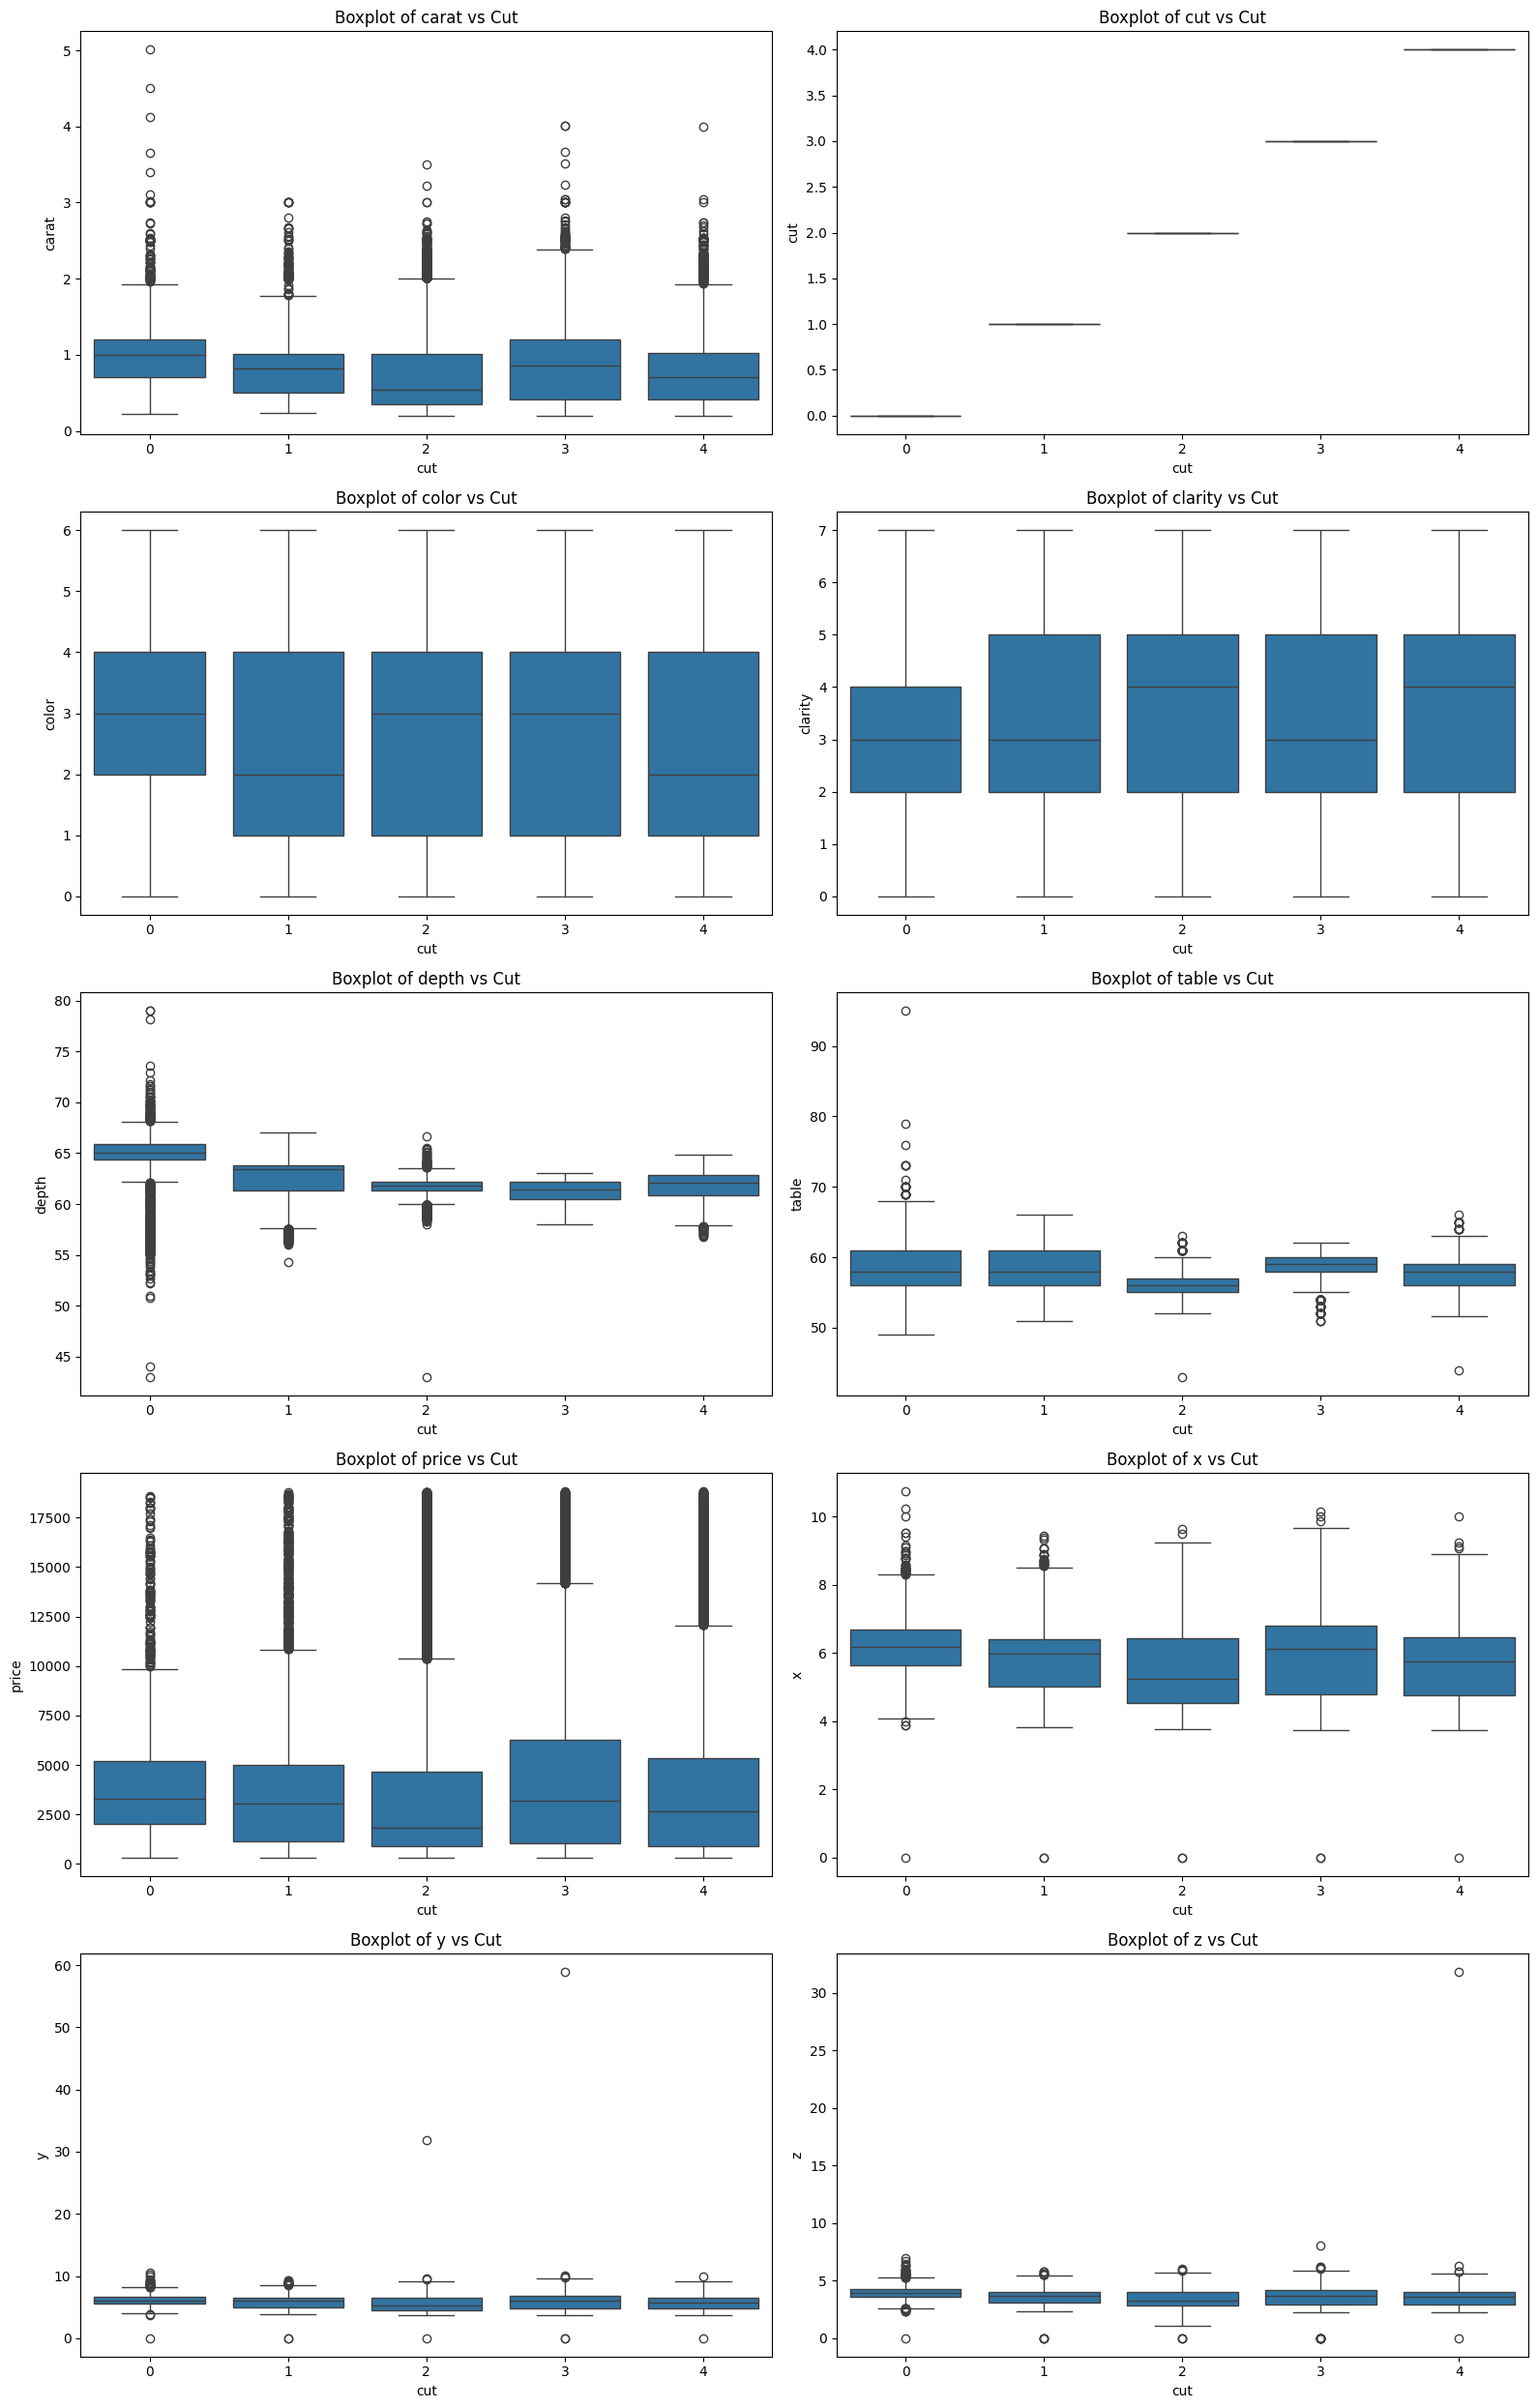

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse de la relation entre les variables numériques et la colonne 'cut'
# Filtrer les colonnes numériques
numeric_columns = Diamond.select_dtypes(include=[np.number]).columns

# Déterminer le nombre de lignes et de colonnes pour les sous-graphiques
num_cols = 2  # Nombre de colonnes dans la grille de sous-graphiques
num_plots = len(numeric_columns)  # Nombre de variables numériques à tracer
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaires

fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
ax = ax.flatten()  # Aplatir le tableau pour un accès plus facile

col_index = 0
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=Diamond['cut'], y=Diamond[column], ax=ax[col_index])
    ax[col_index].set_title(f'Boxplot of {column} vs Cut')
    col_index += 1

# Supprimez les sous-graphiques inutilisés
for j in range(col_index, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


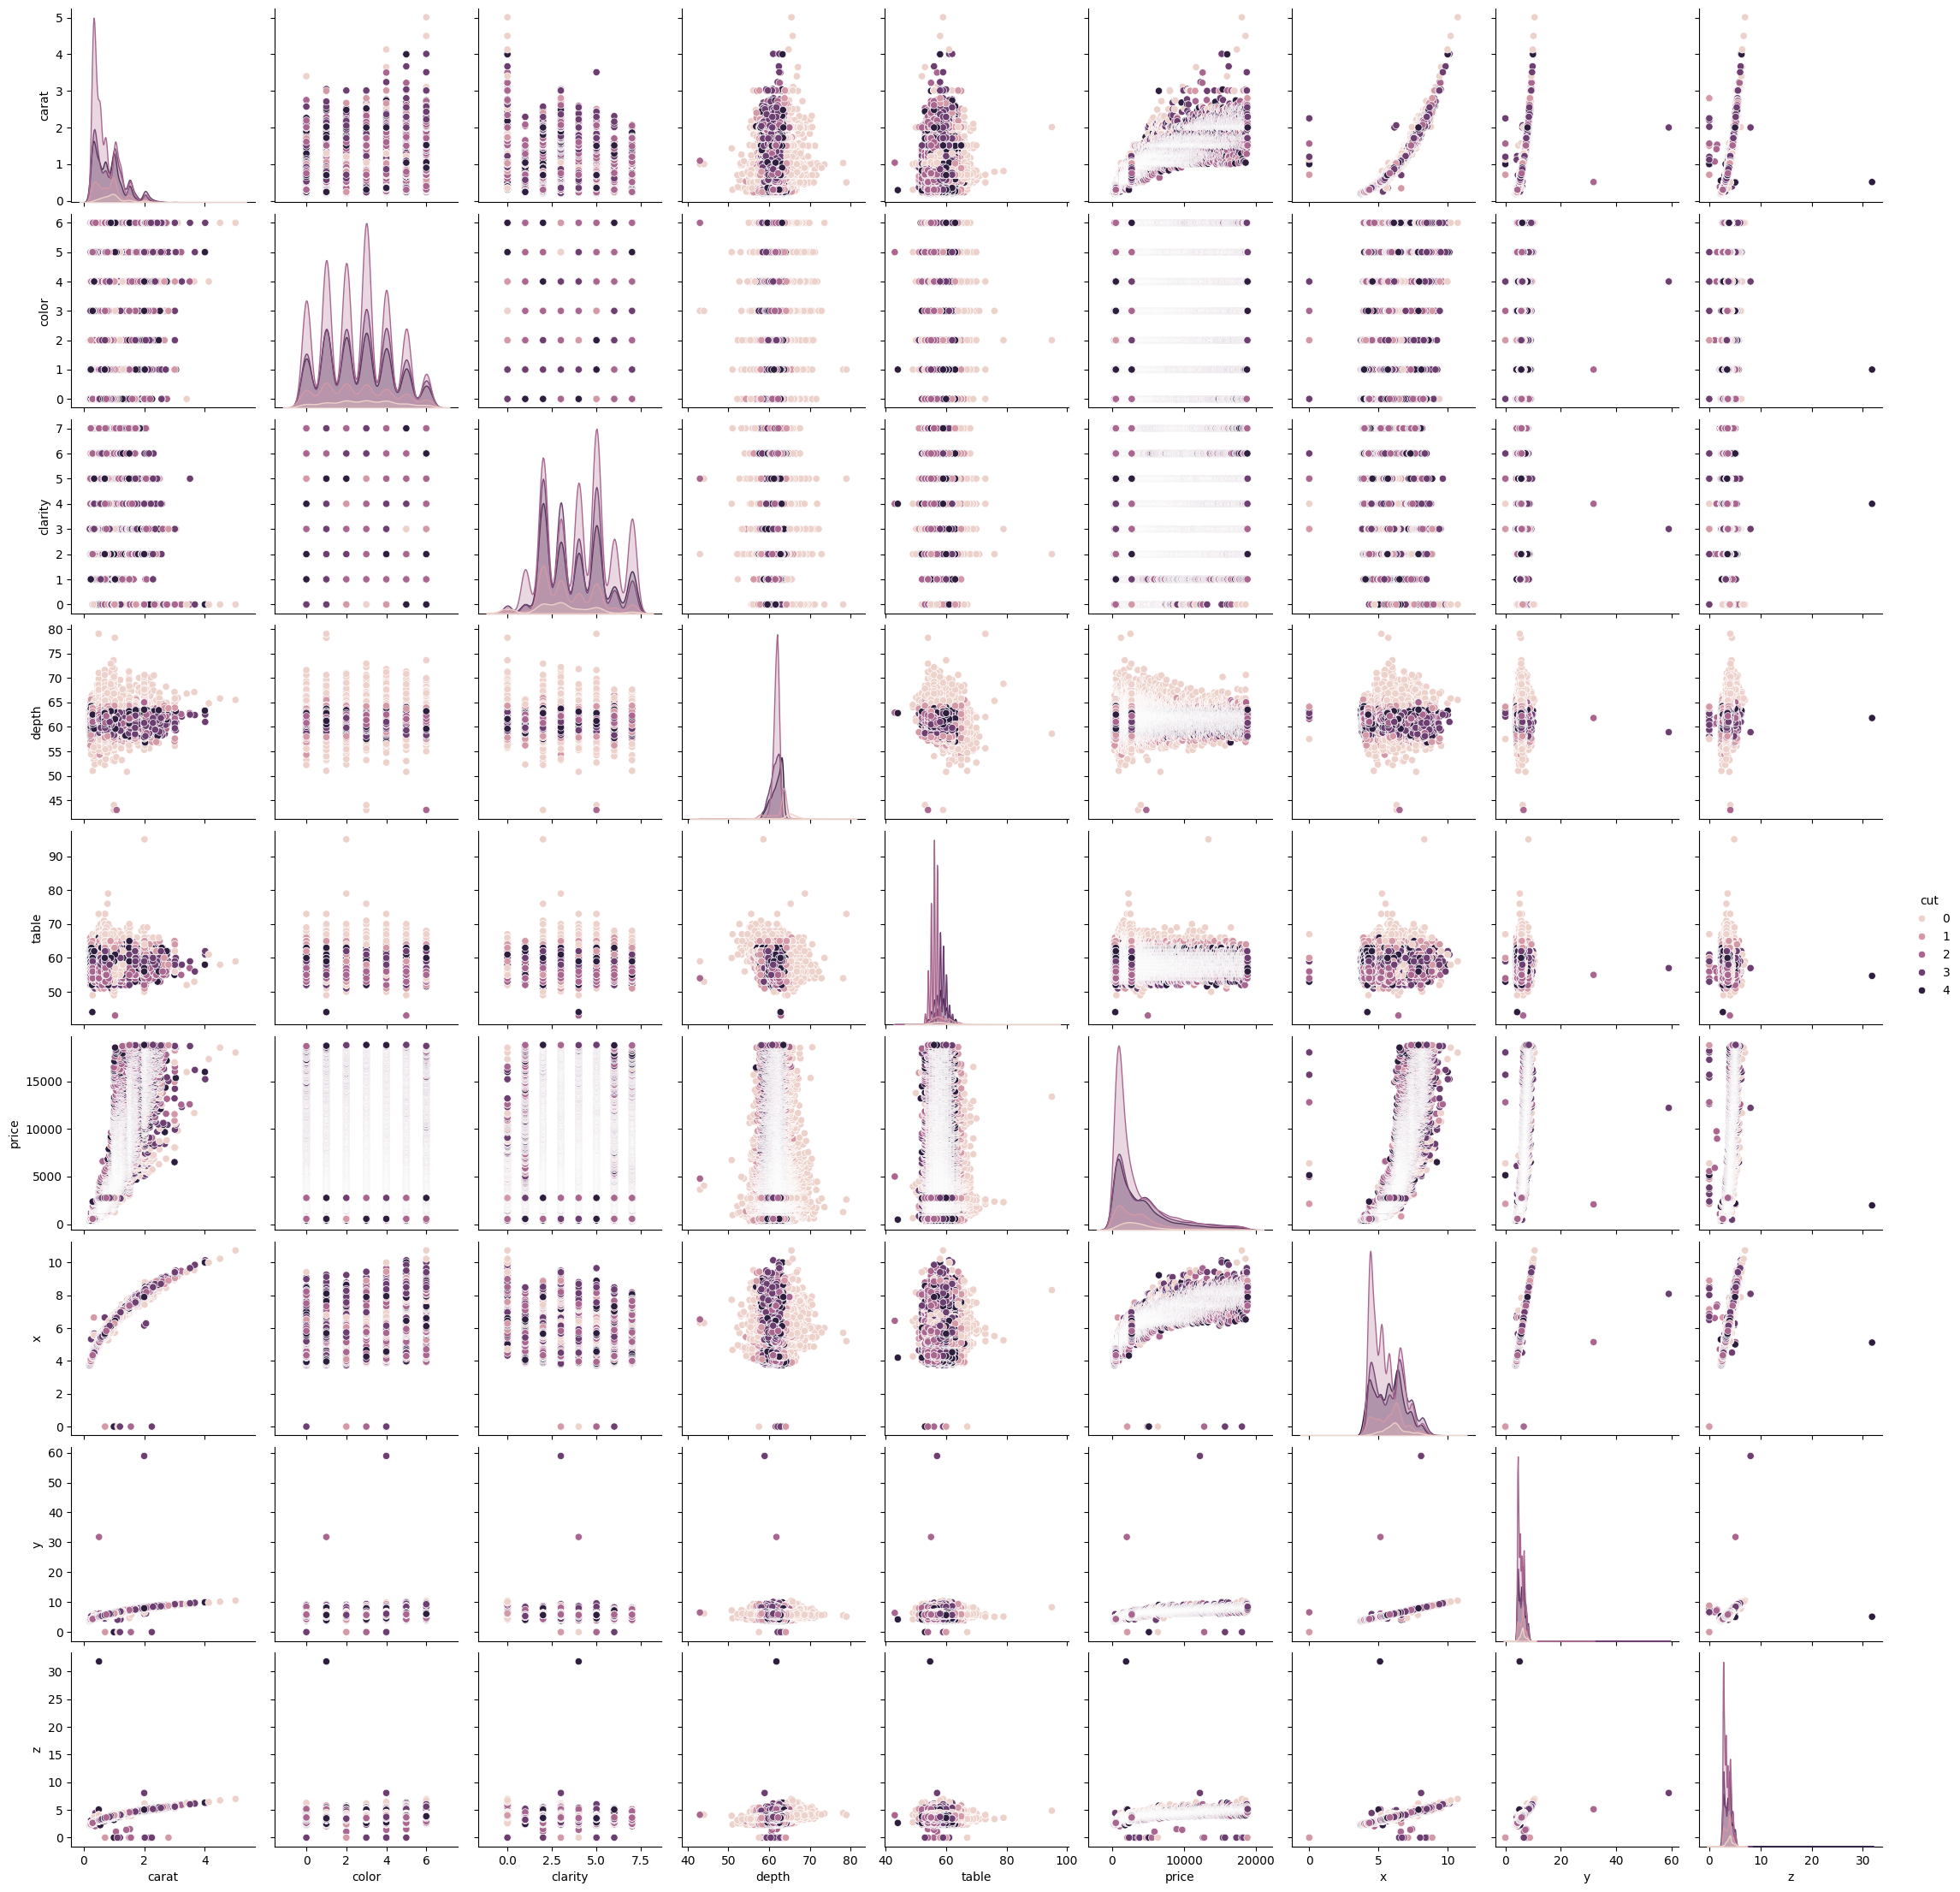

In [ ]:
# pairplot

p=sns.pairplot(Diamond, hue = 'cut')

In [ ]:
# Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable

for column in Diamond.columns[:-1]:
    _, p_value = stats.kruskal(*[Diamond[column][Diamond.cut == cut] for cut in Diamond.cut.unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les qualités de diamond (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les qualités de diamond (p-value={p_value})")

La variable carat est significativement différente entre les qualités de diamond (p-value=0.0)
La variable cut est significativement différente entre les qualités de diamond (p-value=0.0)
La variable color est significativement différente entre les qualités de diamond (p-value=3.057848984475736e-25)
La variable clarity est significativement différente entre les qualités de diamond (p-value=3.4354406700962595e-216)
La variable depth est significativement différente entre les qualités de diamond (p-value=0.0)
La variable table est significativement différente entre les qualités de diamond (p-value=0.0)
La variable price est significativement différente entre les qualités de diamond (p-value=1.533414952159139e-210)
La variable x est significativement différente entre les qualités de diamond (p-value=0.0)
La variable y est significativement différente entre les qualités de diamond (p-value=0.0)


# **TP3**
4.Analyse des Correspondances Multiples (ACM)

4.1 Analyse des Correspondances Multiples adaptée aux variables qualitatives

- Commençons d'abord par l'analyse bivariée

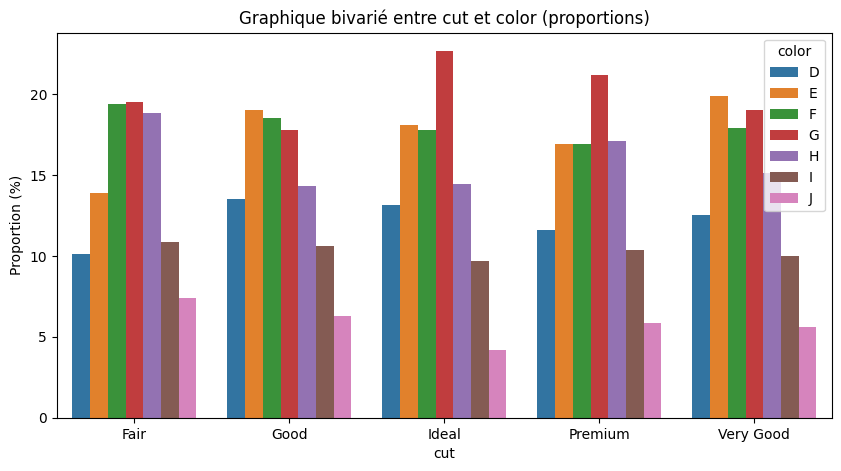

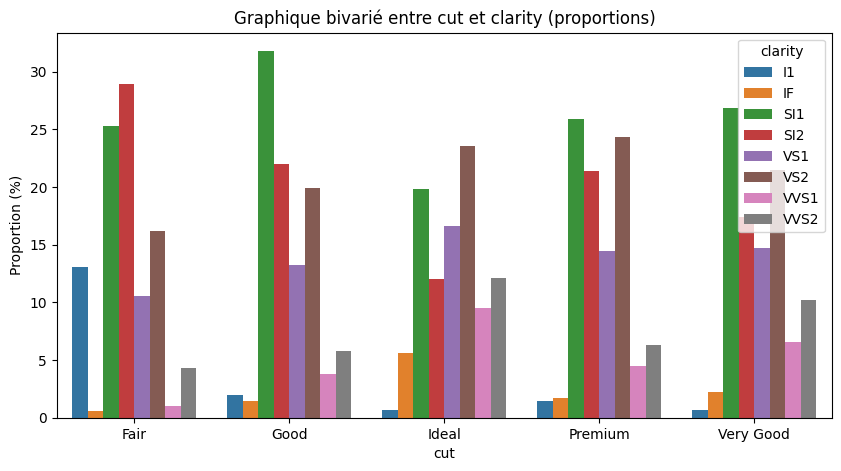

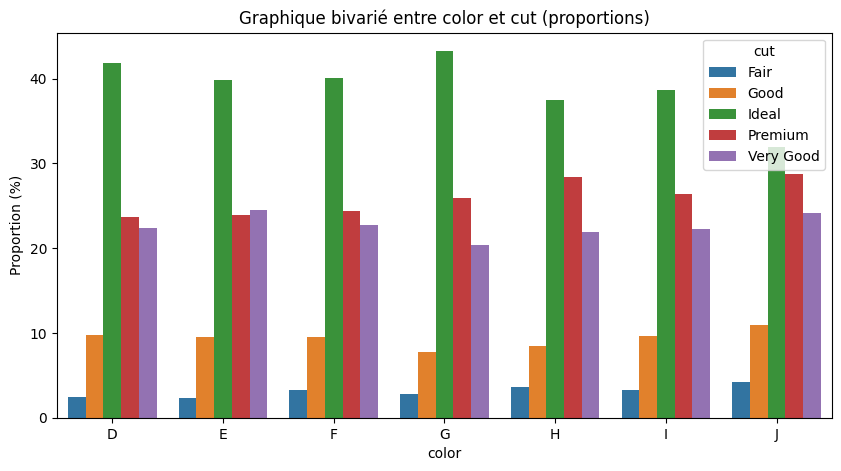

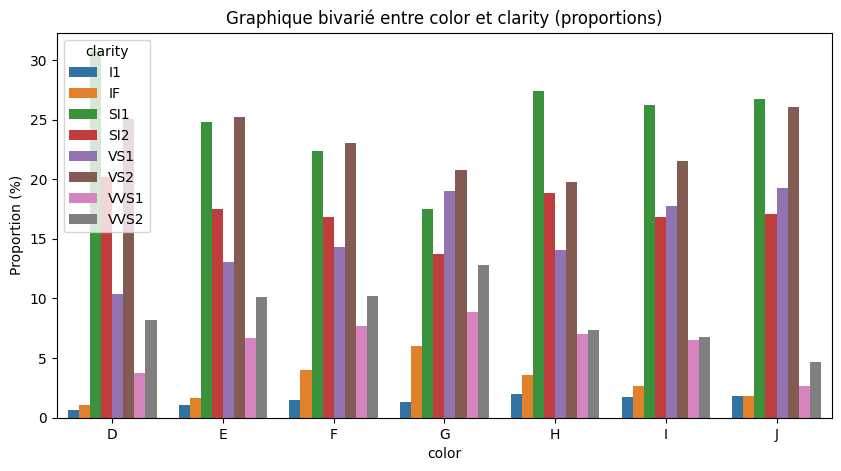

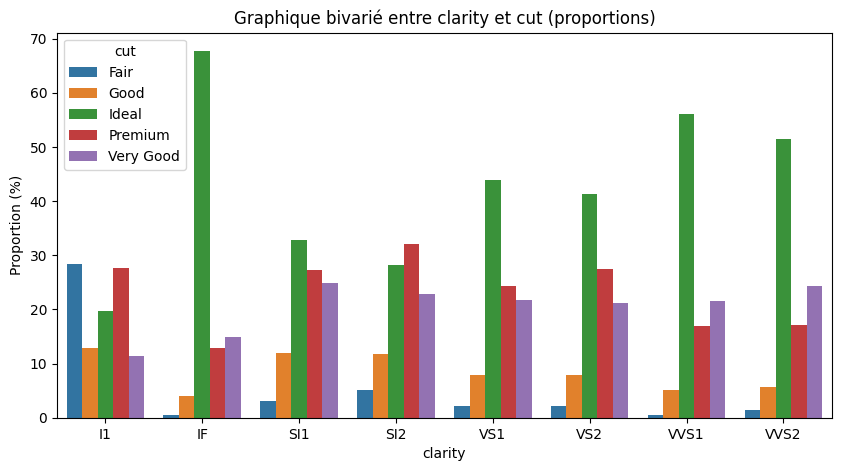

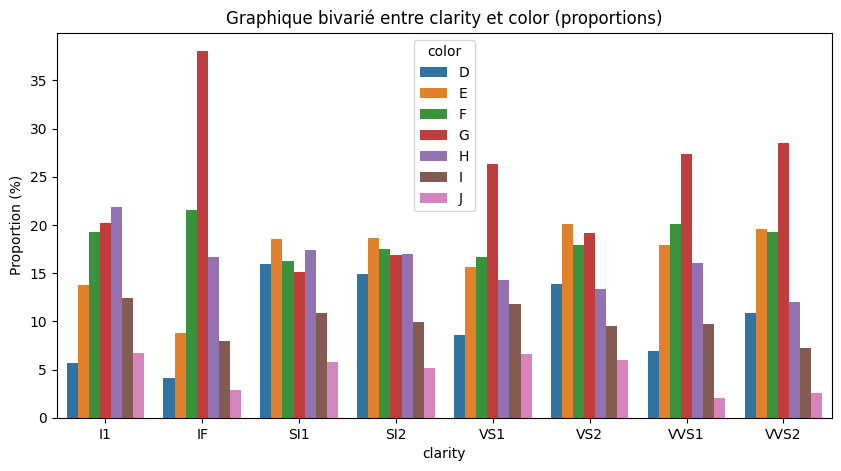

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
file_path = '/content/drive/MyDrive/diamonds.csv'
diamonds_data = pd.read_csv(file_path)

# Liste des variables qualitatives
categorical_columns = ['cut', 'color', 'clarity']

# Créer des graphiques bivariés pour chaque paire de variables qualitatives
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Calculer les proportions pour le graphique bivarié
            proportions = diamonds_data.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            # Créer un graphique en barres empilées pour la paire de variables
            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.show()



*4.3 Application de l'ACM*

In [ ]:
!pip install fanalysis

*4.3.1 Analyse multivariées grâce à l'ACM*

In [ ]:
import pandas as pd
import fanalysis.mca as mca


# Liste des variables qualitatives de votre dataset
categorical_columns = ['cut', 'color', 'clarity']

# Sélectionner uniquement les colonnes catégorielles
X = diamonds_data[categorical_columns].values
df = diamonds_data

# Créer une instance de la classe MCA
my_mca = mca.MCA(row_labels=df.index.values, var_labels=categorical_columns)

# Estimation de l'ACM
my_mca.fit(X)



MCA(row_labels=array([    0,     1,     2, ..., 53937, 53938, 53939]),
    var_labels=['cut', 'color', 'clarity'])

*4.3.1 Analyse des valeurs propres et visualisation*

Valeurs propres :
[[  0.43135726   0.39365801   0.36024936   0.35056151   0.34758625
    0.34494101   0.34110352   0.33673739   0.33485644   0.33003883
    0.32423456   0.32082432   0.31410809   0.30906597   0.30601013
    0.27808141   0.24325258]
 [  7.61218693   6.94690604   6.35734172   6.1863796    6.13387498
    6.08719433   6.01947391   5.94242459   5.90923134   5.82421473
    5.72178642   5.66160573   5.54308398   5.4541053    5.40017877
    4.90731907   4.29269256]
 [  7.61218693  14.55909297  20.91643469  27.10281429  33.23668927
   39.3238836   45.3433575   51.28578209  57.19501344  63.01922817
   68.74101459  74.40262032  79.9457043   85.3998096   90.79998837
   95.70730744 100.        ]]


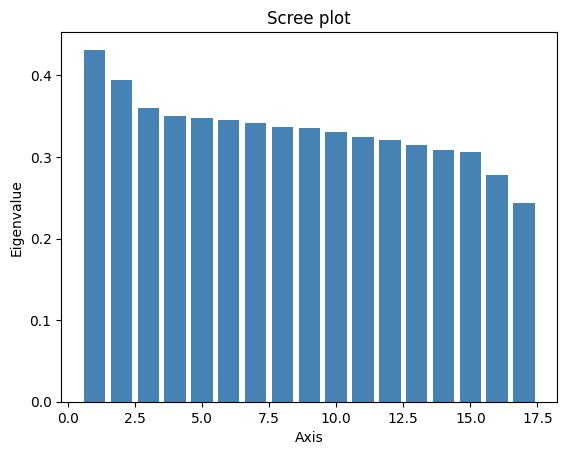

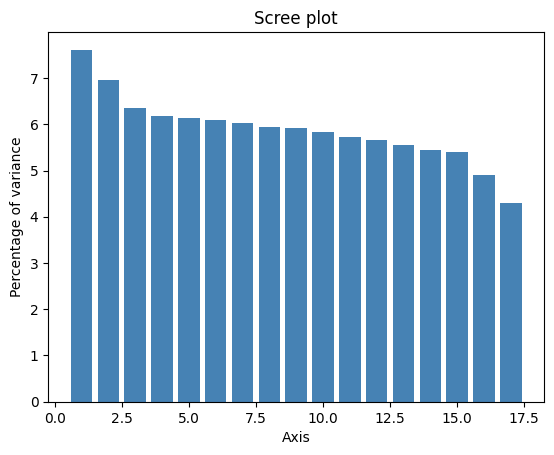

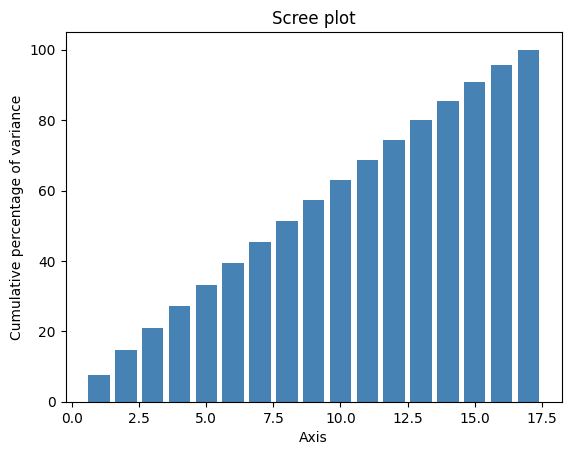

In [ ]:
# Analyse des valeurs propres
print("Valeurs propres :")
print(my_mca.eig_)

# Graphique des valeurs propres
my_mca.plot_eigenvalues()

# Pourcentage de variance expliqué par chaque axe
my_mca.plot_eigenvalues(type="percentage")

# Variance expliquée cumulée
my_mca.plot_eigenvalues(type="cumulative")


*4.3.2 Analyse de la qualité de représentation des individus (profil ligne)*

In [ ]:
# Extraire les données de représentation des lignes en DataFrame
df_rows = my_mca.row_topandas()
print(df_rows)



       row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
0            0.056227        0.190567        0.428259       -0.181280   
1            0.568268        0.560734        0.044153       -0.055415   
2            0.264808        0.295732       -0.260863       -0.449990   
3            0.359546        0.177778       -0.842452       -0.357028   
4            1.261848        0.192311       -0.790261       -0.391173   
...               ...             ...             ...             ...   
53935        0.129372        0.605966        0.531066        0.503542   
53936        0.929058        0.858236        0.524668        0.730773   
53937        0.565213        0.906718        0.664369        0.341538   
53938        0.829846       -0.086175       -0.533708        0.913245   
53939        0.241245        0.358695        0.414416        0.361552   

       row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
0            0.338940       -0.609271        0.073

*Qualité de représentation des individus sur les premiers axes*

Premier Axe


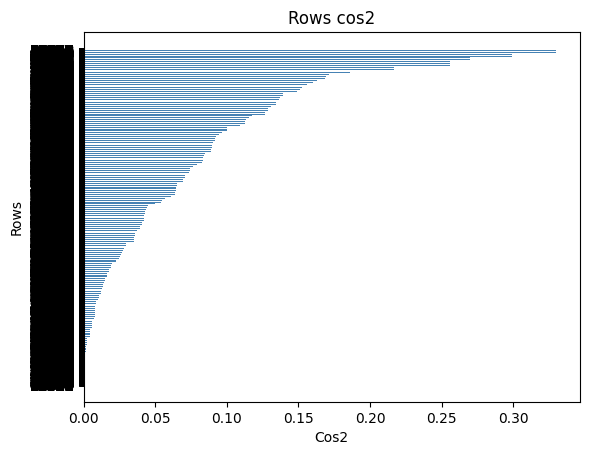

Deuxième Axe


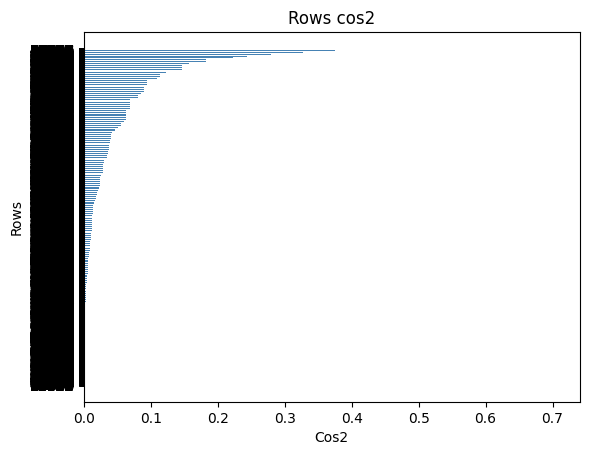

In [ ]:
# Qualité de représentation des individus sur le Premier Axe
print("Premier Axe")
my_mca.plot_row_cos2(num_axis=1)

# Qualité de représentation des individus sur le Deuxième Axe
print("Deuxième Axe")
my_mca.plot_row_cos2(num_axis=2)


*Qualité de représentation des modalités des variables (profil colonnes)*

Premier Axe


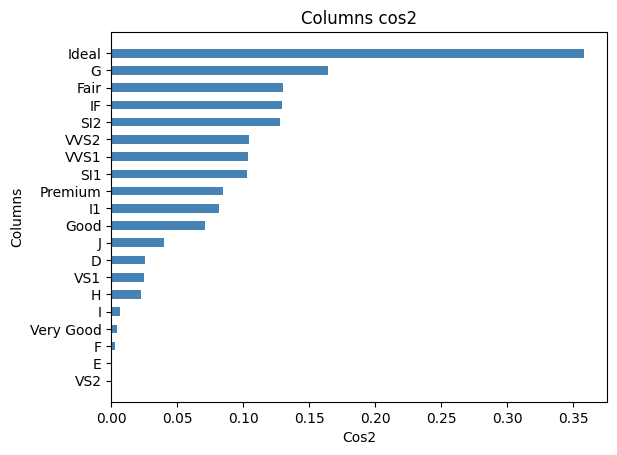

Deuxième Axe


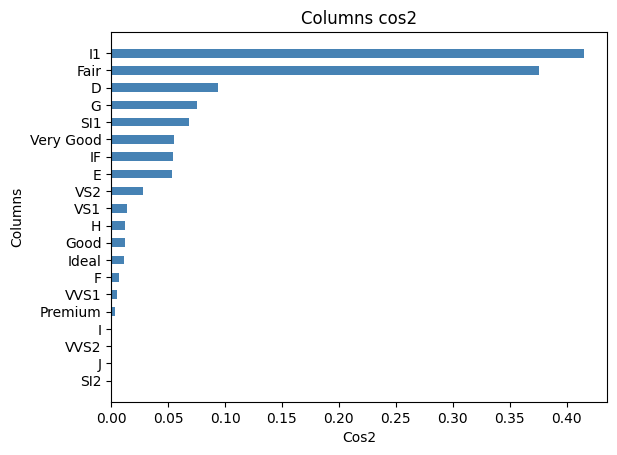

Troisième Axe


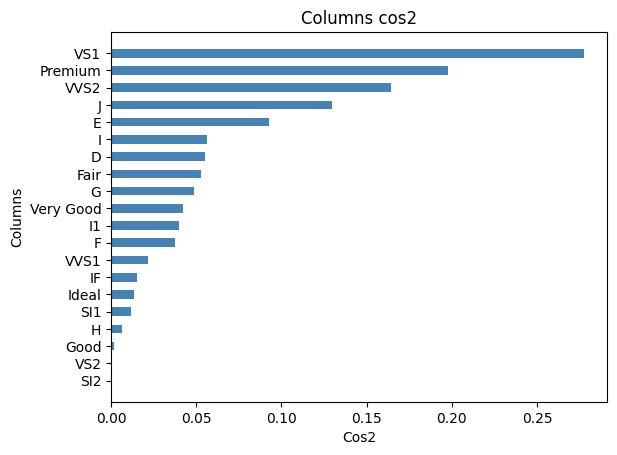

In [ ]:
# Qualité de représentation des modalités sur le Premier Axe
print("Premier Axe")
my_mca.plot_col_cos2(num_axis=1)

# Qualité de représentation des modalités sur le Deuxième Axe
print("Deuxième Axe")
my_mca.plot_col_cos2(num_axis=2)

# Qualité de représentation des modalités sur le Troisième Axe
print("Troisième Axe")
my_mca.plot_col_cos2(num_axis=3)


*Analyse des contributions des modalités aux axes*

Premier Axe


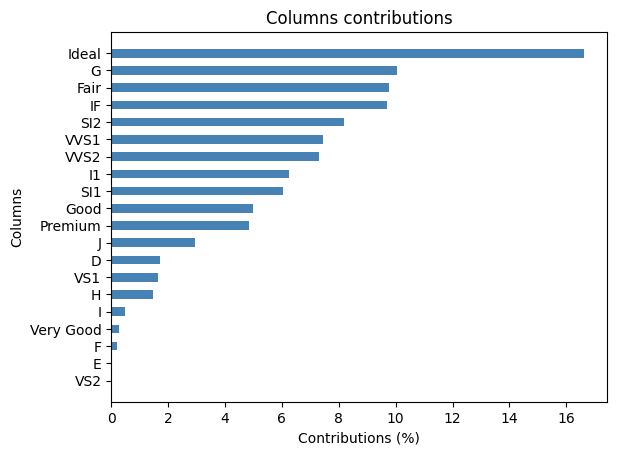

Deuxième Axe


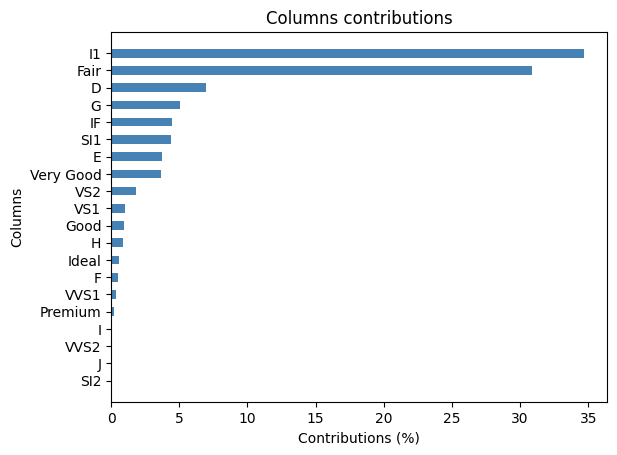

In [ ]:
# Contribution des modalités sur le Premier Axe
print("Premier Axe")
my_mca.plot_col_contrib(num_axis=1)

# Contribution des modalités sur le Deuxième Axe
print("Deuxième Axe")
my_mca.plot_col_contrib(num_axis=2)


*Graphiques des points pour les colonnes*

Le code ci-dessous génère les graphiques des points colonnes pour plusieurs combinaisons d'axes (1er, 2ème et 3ème axes).

Graphique des points colonnes (Axes 1 et 2)


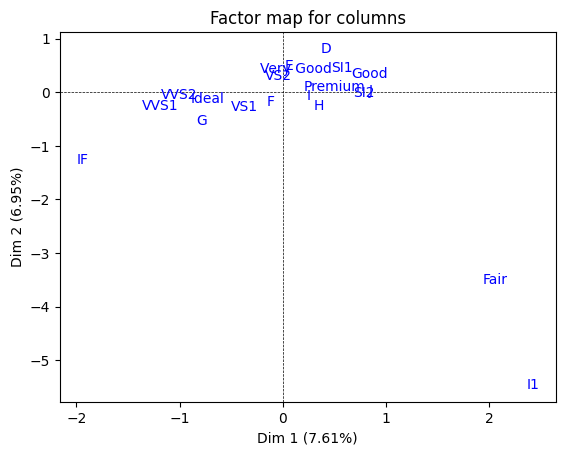

Graphique des points colonnes (Axes 1 et 3)


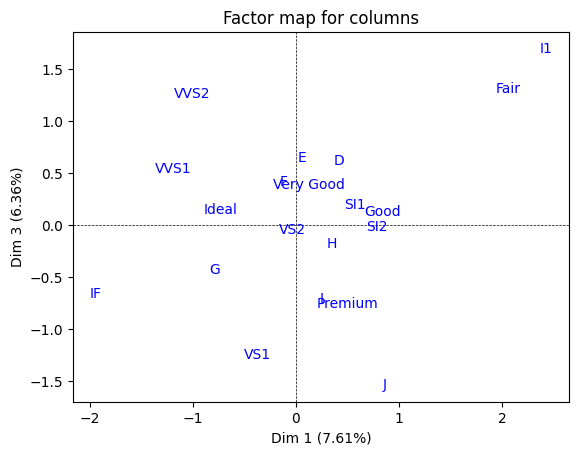

Graphique des points colonnes (Axes 2 et 3)


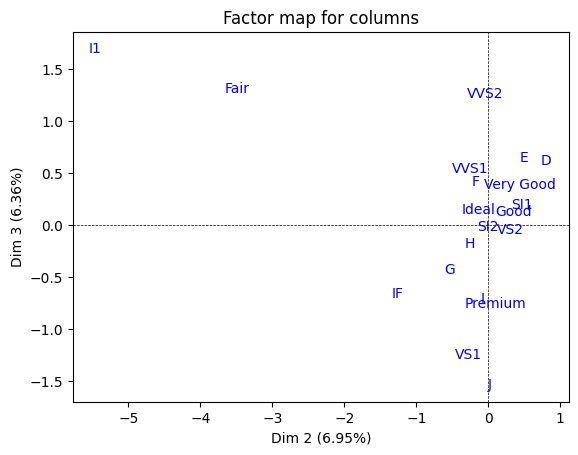

In [ ]:
# Graphique des points colonnes pour le 1er et 2ème axe
print("Graphique des points colonnes (Axes 1 et 2)")
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

# Graphique des points colonnes pour le 1er et 3ème axe
print("Graphique des points colonnes (Axes 1 et 3)")
my_mca.mapping_col(num_x_axis=1, num_y_axis=3)

# Graphique des points colonnes pour le 2ème et 3ème axe
print("Graphique des points colonnes (Axes 2 et 3)")
my_mca.mapping_col(num_x_axis=2, num_y_axis=3)


*Graphique de superposition des individus et des modalités*



Graphique de superposition (Axes 1 et 2)


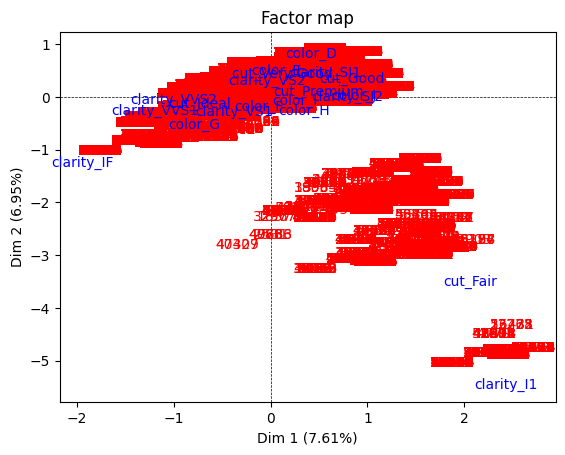

In [ ]:
# Graphique de superposition des individus et des colonnes pour le 1er et 2ème axe
print("Graphique de superposition (Axes 1 et 2)")
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)


TP4 ** La Classification automatique**

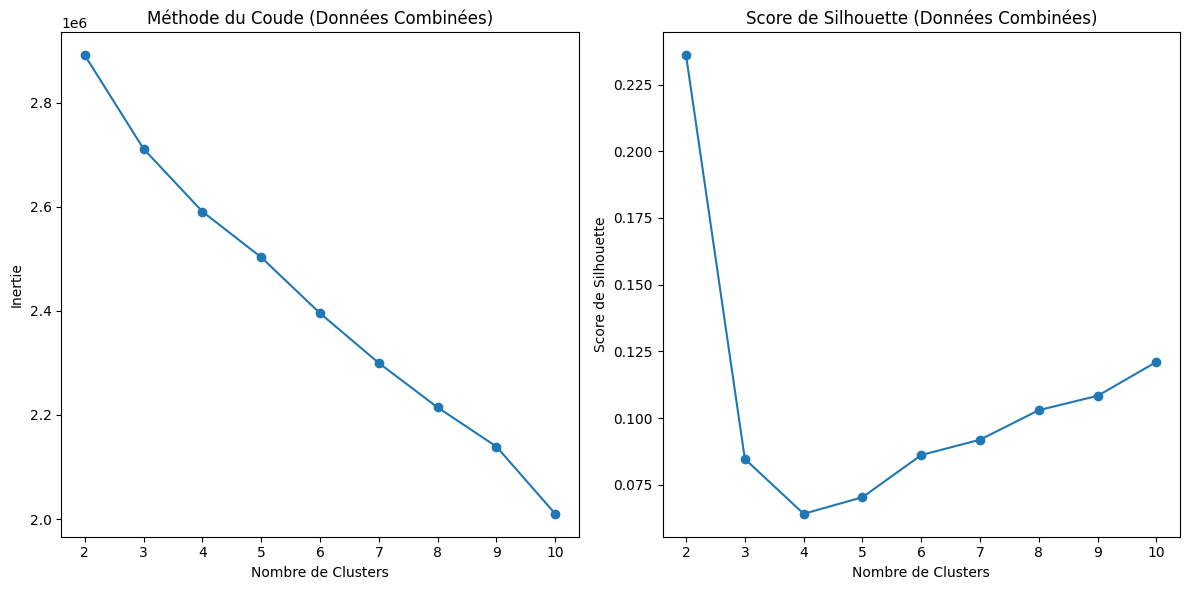

In [ ]:
# Supposons que df_diamonds contient les données d'origine
# Sélectionner les colonnes pertinentes des données d'origine
# Par exemple : 'carat', 'depth', 'table', 'x', 'y', 'z'
diamonds_features = diamonds_data[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Combiner les deux jeux de données (ACM + données d'origine)
combined_features = pd.concat([df_rows, diamonds_features], axis=1)

# Normaliser les caractéristiques combinées
scaler = StandardScaler()
scaled_combined_features = scaler.fit_transform(combined_features)

# Méthode du coude pour déterminer le nombre de clusters
inertia_combined = []
silhouette_scores_combined = []
k_range = range(2, 11)  # Test de 2 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_combined_features)
    inertia_combined.append(kmeans.inertia_)
    silhouette_avg_combined = silhouette_score(scaled_combined_features, kmeans.labels_)
    silhouette_scores_combined.append(silhouette_avg_combined)

# Tracer la méthode du coude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_combined, marker='o')
plt.title('Méthode du Coude (Données Combinées)')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')

# Tracer le score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores_combined, marker='o')
plt.title('Score de Silhouette (Données Combinées)')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')

plt.tight_layout()
plt.show()


*ACP pour reste de données d'origine*

carat    0
depth    0
table    0
x        0
y        0
z        0
dtype: int64


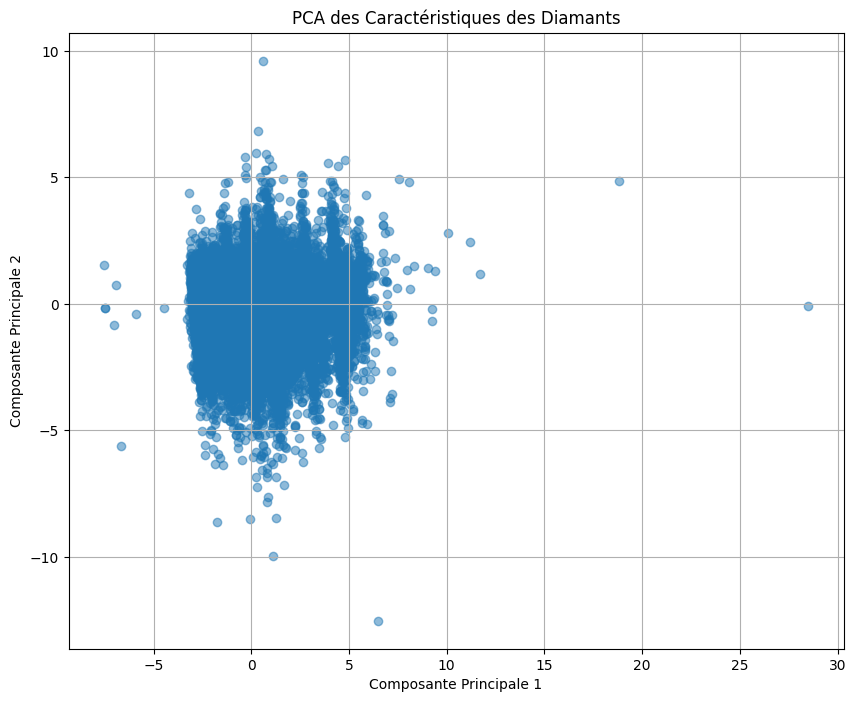

Variance expliquée par PC1: 0.66
Variance expliquée par PC2: 0.21


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sélectionner les colonnes pertinentes des données d'origine
diamonds_features = diamonds_data[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Vérifiez les valeurs manquantes
print(diamonds_features.isnull().sum())

# Gérer les valeurs manquantes si nécessaire
# diamonds_features.fillna(diamonds_features.mean(), inplace=True)

# Normaliser les données
scaler = StandardScaler()
scaled_diamonds_features = scaler.fit_transform(diamonds_features)

# Appliquer PCA
pca = PCA(n_components=2)  # Choisissez le nombre de composantes principales souhaité
X_acp = pca.fit_transform(scaled_diamonds_features)  # Stockez les résultats dans X_acp

# Convertir les résultats en DataFrame pour une manipulation plus facile
pca_df = pd.DataFrame(data=X_acp, columns=['PC1', 'PC2'])

# Visualiser les résultats de PCA
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA des Caractéristiques des Diamants')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.show()

# Afficher la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f'Variance expliquée par PC1: {explained_variance[0]:.2f}')
print(f'Variance expliquée par PC2: {explained_variance[1]:.2f}')


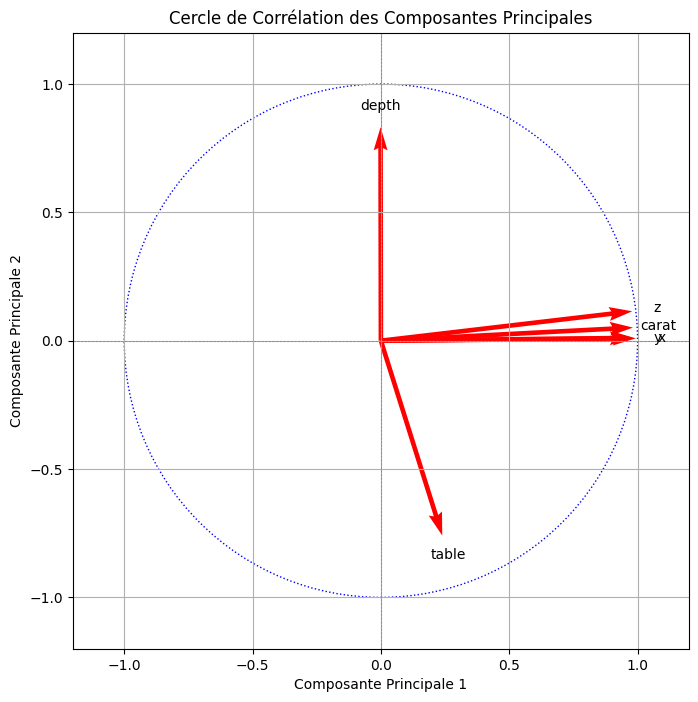

In [ ]:
# Calculer les chargements (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Créer le cercle de corrélation
plt.figure(figsize=(8, 8))
# Dessiner le cercle unitaire
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dotted')
plt.gca().add_artist(circle)

# Dessiner les flèches
plt.quiver(np.zeros(loadings.shape[0]), np.zeros(loadings.shape[0]), loadings[:, 0], loadings[:, 1],
           angles='xy', scale_units='xy', scale=1, color='r')

# Configurer les limites et les axes
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')

# Ajouter les étiquettes des variables
for i in range(loadings.shape[0]):
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, diamonds_features.columns[i],
             color='black', ha='center', va='center')

plt.title('Cercle de Corrélation des Composantes Principales')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

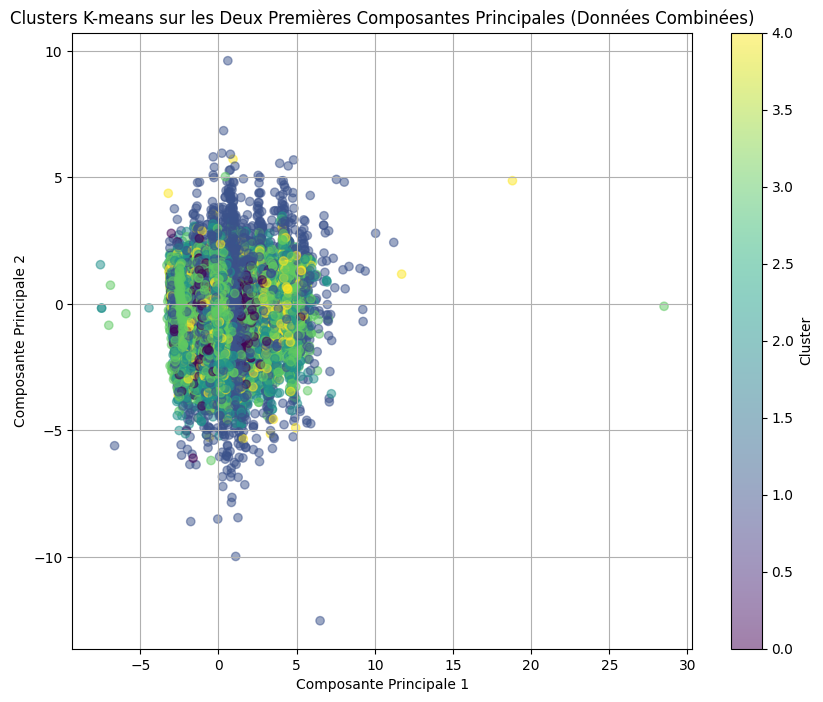

Silhouette Score: 0.067


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supposons que df_rows contient les résultats de l'ACM
# et pca_df contient les résultats de l'ACP

# Étape 1 : Combiner les résultats de l'ACM et de l'ACP
combined_features = pd.concat([df_rows.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Étape 2 : Normaliser les caractéristiques combinées
scaler_combined = StandardScaler()
scaled_combined_features = scaler_combined.fit_transform(combined_features)

# Étape 3 : Choisissez le nombre de clusters
n_clusters = 5  # Ajustez ce nombre après avoir évalué la méthode du coude si nécessaire
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_combined_features)

# Étape 4 : Ajouter les labels de cluster au DataFrame combiné
combined_features['Cluster'] = cluster_labels

# Étape 5 : Visualiser les clusters dans les deux premières dimensions (PC1 et PC2)
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'],
            c=combined_features['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters K-means sur les Deux Premières Composantes Principales (Données Combinées)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Étape 6 : Évaluation de la qualité du clustering
silhouette_avg = silhouette_score(scaled_combined_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')


In [ ]:
import scipy.cluster.hierarchy as sch

# Étape 1 : Calculer la matrice de distance
from sklearn.metrics import pairwise_distances

# Utiliser la matrice de distance sur les données normalisées
distance_matrix = pairwise_distances(scaled_combined_features)

# Étape 2 : Appliquer l'algorithme de liaison (linkage)
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Étape 3 : Tracer le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=combined_features['Cluster'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogramme des Classes')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


**

*I. PREMIÈRE MÉTHODE AVEC LA RÉGRESSION LINÉAIRE*

*I.1 Division des données d'entrâinement et de test*

*A. les données issues de l'ACM (dimensions principales uniquement)*

In [ ]:
from sklearn.model_selection import train_test_split

# Colonnes correspondant aux dimensions principales (les premières coordonnées des lignes de l'ACM)
acm_features = ['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
                'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8']

# Extraire les caractéristiques ACM
X_acm = df_rows[acm_features]

# Supposons que la variable cible soit `price` dans le DataFrame principal df
y_acm = df['price']

# Diviser en ensembles d'entraînement et de test
X_train_acm, X_test_acm, y_train_acm, y_test_acm = train_test_split(X_acm, y_acm, test_size=0.2, random_state=42)

print(X_train_acm.shape, X_test_acm.shape)


(43152, 8) (10788, 8)


*B. les données d'ACP + données ACM pour les sonnées categorielles*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supposons que X_acp contient les résultats de l'ACP (défini précédemment)
# et que df contient les prix des diamants (df doit être votre DataFrame d'origine)

# Étape 1 : Assurez-vous que les résultats de l'ACM sont déjà disponibles.
# X_acm doit être un DataFrame contenant les résultats de l'ACM.

# Étape 2 : Combiner les données d'ACP et les résultats de l'ACM
# Assurez-vous que X_acm est défini et est un DataFrame
X_combined = pd.concat([pd.DataFrame(X_acp), pd.DataFrame(X_acm)], axis=1)

# Diviser les données en X (caractéristiques) et y (cible)
y_combined = df['price']  # df doit contenir la colonne 'price'

# Diviser en ensembles d'entraînement et de test
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print(X_train_combined.shape, X_test_combined.shape)


(43152, 10) (10788, 10)


*I.2.1 Régression linéaire avec les données issues de l'ACM*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialiser le modèle de régression linéaire
model_acm = LinearRegression()

# Entraîner le modèle sur les données issues de l'ACM
model_acm.fit(X_train_acm, y_train_acm)

# Prédictions sur l'ensemble de test
y_pred_acm = model_acm.predict(X_test_acm)

# Évaluer le modèle avec les métriques demandées
r2_acm = r2_score(y_test_acm, y_pred_acm)
mae_acm = mean_absolute_error(y_test_acm, y_pred_acm)
mse_acm = mean_squared_error(y_test_acm, y_pred_acm)
rmse_acm = np.sqrt(mse_acm)

print("Régression linéaire avec ACM :")
print("R²:", r2_acm)
print("MAE:", mae_acm)
print("MSE:", mse_acm)
print("RMSE:", rmse_acm)


Régression linéaire avec ACM :
R²: 0.04983231410735445
MAE: 2890.460027982898
MSE: 15104646.051391918
RMSE: 3886.4696128224027


*I.2.2 Régression linéaire avec les données combinées (issues de l'ACP + ACM)*

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Convertir les noms de colonnes de X_train_combined en chaînes de caractères
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Initialiser le modèle de régression linéaire pour les données combinées (PCA + ACM)
model_combined = LinearRegression()

# Entraîner le modèle sur les données combinées
model_combined.fit(X_train_combined, y_train_combined)

# Prédictions sur l'ensemble de test
y_pred_combined = model_combined.predict(X_test_combined)

# Évaluer le modèle avec les métriques demandées
r2_combined = r2_score(y_test_combined, y_pred_combined)
mae_combined = mean_absolute_error(y_test_combined, y_pred_combined)
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)
rmse_combined = np.sqrt(mse_combined)

print("Régression linéaire avec données combinées (ACP + ACM) :")
print("R²:", r2_combined)
print("MAE:", mae_combined)
print("MSE:", mse_combined)
print("RMSE:", rmse_combined)


Régression linéaire avec données combinées (ACP + ACM) :
R²: 0.8501316255510774
MAE: 1156.4969613930389
MSE: 2382430.7898050416
RMSE: 1543.512484499248


*II. LA DEUXIÈME MÉTHODE FORÊT D'ARBRES DÉCISIONNELS*

Forêt d'arbres décisionnels (Random Forest Regressor)
La forêt aléatoire est un modèle d'ensemble basé sur des arbres de décision. Elle construit plusieurs arbres de décision pendant l'entraînement et produit la moyenne des prédictions des différents arbres pour améliorer la précision et réduire le surapprentissage (overfitting).

*II.1  Random Forest avec les données issues de l'ACM*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Créer et entraîner le modèle Random Forest pour les données issues de l'ACM
rf_model_acm = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_acm.fit(X_train_acm, y_train_acm)

# Faire des prédictions sur les données de test issues de l'ACM
y_pred_rf_acm = rf_model_acm.predict(X_test_acm)

# Évaluer le modèle avec les métriques demandées
print("Random Forest avec ACM :")
print("R²:", r2_score(y_test_acm, y_pred_rf_acm))
print("MAE:", mean_absolute_error(y_test_acm, y_pred_rf_acm))
print("MSE:", mean_squared_error(y_test_acm, y_pred_rf_acm))
print("RMSE:", np.sqrt(mean_squared_error(y_test_acm, y_pred_rf_acm)))


Random Forest avec ACM :
R²: 0.08880762645600992
MAE: 2804.603885426683
MSE: 14485062.469978267
RMSE: 3805.9246537442473


*II.2 Random Forest avec les données combinées (issues de l'ACP + ACM)*

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Convertir les noms de colonnes de X_train_combined et X_test_combined en chaînes de caractères
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Créer et entraîner le modèle Random Forest pour les données combinées
rf_model_combined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_combined.fit(X_train_combined, y_train_combined)

# Faire des prédictions sur les données de test combinées
y_pred_rf_combined = rf_model_combined.predict(X_test_combined)

# Évaluer le modèle avec les métriques demandées
print("Random Forest avec données combinées (ACP + ACM) :")
print("R²:", r2_score(y_test_combined, y_pred_rf_combined))
print("MAE:", mean_absolute_error(y_test_combined, y_pred_rf_combined))
print("MSE:", mean_squared_error(y_test_combined, y_pred_rf_combined))
print("RMSE:", np.sqrt(mean_squared_error(y_test_combined, y_pred_rf_combined)))


Random Forest avec données combinées (ACP + ACM) :
R²: 0.9769061351020583
MAE: 312.2820628858638
MSE: 367119.046902092
RMSE: 605.9034963606763
